In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [44]:
df = pd.read_csv('../data/breast_cancer_data.csv')
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events


In [45]:
df.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    0
irradiat       0
class          0
dtype: int64

In [46]:
df.shape

(286, 10)

In [47]:
df['node-caps'].value_counts()

node-caps
no     222
yes     56
Name: count, dtype: int64

In [48]:
df.dropna(how='any',inplace=True)
df.shape

(278, 10)

<Axes: xlabel='class', ylabel='count'>

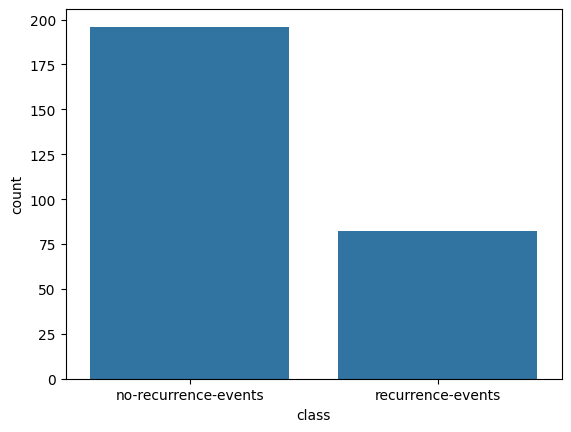

In [49]:
sns.barplot(df['class'].value_counts())

`age, menopause, tumor-size, inv-nodes, node-caps, breast, breast-quad, irradiat`

In [50]:
df_encoder = pd.get_dummies(df,columns=['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat'],drop_first=True,dtype=int)
df_encoder

,deg-malig,class,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor-size_09-May,tumor-size_14-Oct,tumor-size_15-19,tumor-size_20-24,tumor-size_25-29,tumor-size_30-34,tumor-size_35-39,tumor-size_40-44,tumor-size_45-49,tumor-size_50-54,inv-nodes_05-Mar,inv-nodes_08-Jun,inv-nodes_11-Sep,inv-nodes_14-Dec,inv-nodes_15-17,inv-nodes_24-26,node-caps_yes,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes
0,3,no-recurrence-events,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,no-recurrence-events,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,2,no-recurrence-events,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2,no-recurrence-events,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,2,no-recurrence-events,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,2,recurrence-events,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
282,3,recurrence-events,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
283,1,recurrence-events,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
284,3,recurrence-events,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [51]:
x = df_encoder.drop('class',axis=1)
y = df_encoder['class']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

model = LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

acc = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print(f'Test Accuracy is {round(acc*100,2)}')
print('Classification Report')
print(cr)

Test Accuracy is 73.21
Classification Report
                      precision    recall  f1-score   support

no-recurrence-events       0.75      0.92      0.83        39
   recurrence-events       0.62      0.29      0.40        17

            accuracy                           0.73        56
           macro avg       0.69      0.61      0.61        56
        weighted avg       0.71      0.73      0.70        56



In [52]:
y_train.value_counts()

class
no-recurrence-events    157
recurrence-events        65
Name: count, dtype: int64

In [53]:
under = RandomUnderSampler(random_state=42)

x_train_under,y_train_under = under.fit_resample(x_train,y_train)

y_train.value_counts()

class
no-recurrence-events    157
recurrence-events        65
Name: count, dtype: int64

In [54]:
model = LogisticRegression()
model.fit(x_train_under,y_train_under)

y_pred = model.predict(x_test)

acc = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print(f'Test Accuracy is {round(acc*100,2)}')
print('Classification Report')
print(cr)

Test Accuracy is 69.64
Classification Report
                      precision    recall  f1-score   support

no-recurrence-events       0.81      0.74      0.77        39
   recurrence-events       0.50      0.59      0.54        17

            accuracy                           0.70        56
           macro avg       0.65      0.67      0.66        56
        weighted avg       0.71      0.70      0.70        56



In [55]:
smote = SMOTE(random_state=42)

x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)
y_train_smote.value_counts()

class
no-recurrence-events    157
recurrence-events       157
Name: count, dtype: int64

In [56]:
model = LogisticRegression()
model.fit(x_train_smote,y_train_smote)

y_pred = model.predict(x_test)

acc = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print(f'Test Accuracy is {round(acc*100,2)}')
print('Classification Report')
print(cr)

Test Accuracy is 69.64
Classification Report
                      precision    recall  f1-score   support

no-recurrence-events       0.79      0.77      0.78        39
   recurrence-events       0.50      0.53      0.51        17

            accuracy                           0.70        56
           macro avg       0.64      0.65      0.65        56
        weighted avg       0.70      0.70      0.70        56



In [57]:
tomek = SMOTETomek(random_state=42)

x_train_tomek,y_train_tomek = tomek.fit_resample(x_train,y_train)
y_train_tomek.value_counts()

class
no-recurrence-events    149
recurrence-events       149
Name: count, dtype: int64

In [58]:
model = LogisticRegression()
model.fit(x_train_tomek,y_train_tomek)

y_pred = model.predict(x_test)

acc = accuracy_score(y_test,y_pred)
cr = classification_report(y_test,y_pred)

print(f'Test Accuracy is {round(acc*100,2)}')
print('Classification Report')
print(cr)

Test Accuracy is 69.64
Classification Report
                      precision    recall  f1-score   support

no-recurrence-events       0.81      0.74      0.77        39
   recurrence-events       0.50      0.59      0.54        17

            accuracy                           0.70        56
           macro avg       0.65      0.67      0.66        56
        weighted avg       0.71      0.70      0.70        56

